In [2]:

import pandas as pd


file_path = '/Users/yang/Desktop/Tobigs 21기/eda_homework/WA_Fn-UseC_-HR-Employee-Attrition.csv'
data = pd.read_csv(file_path)
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:

# 결측치  확인
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values


Series([], dtype: int64)

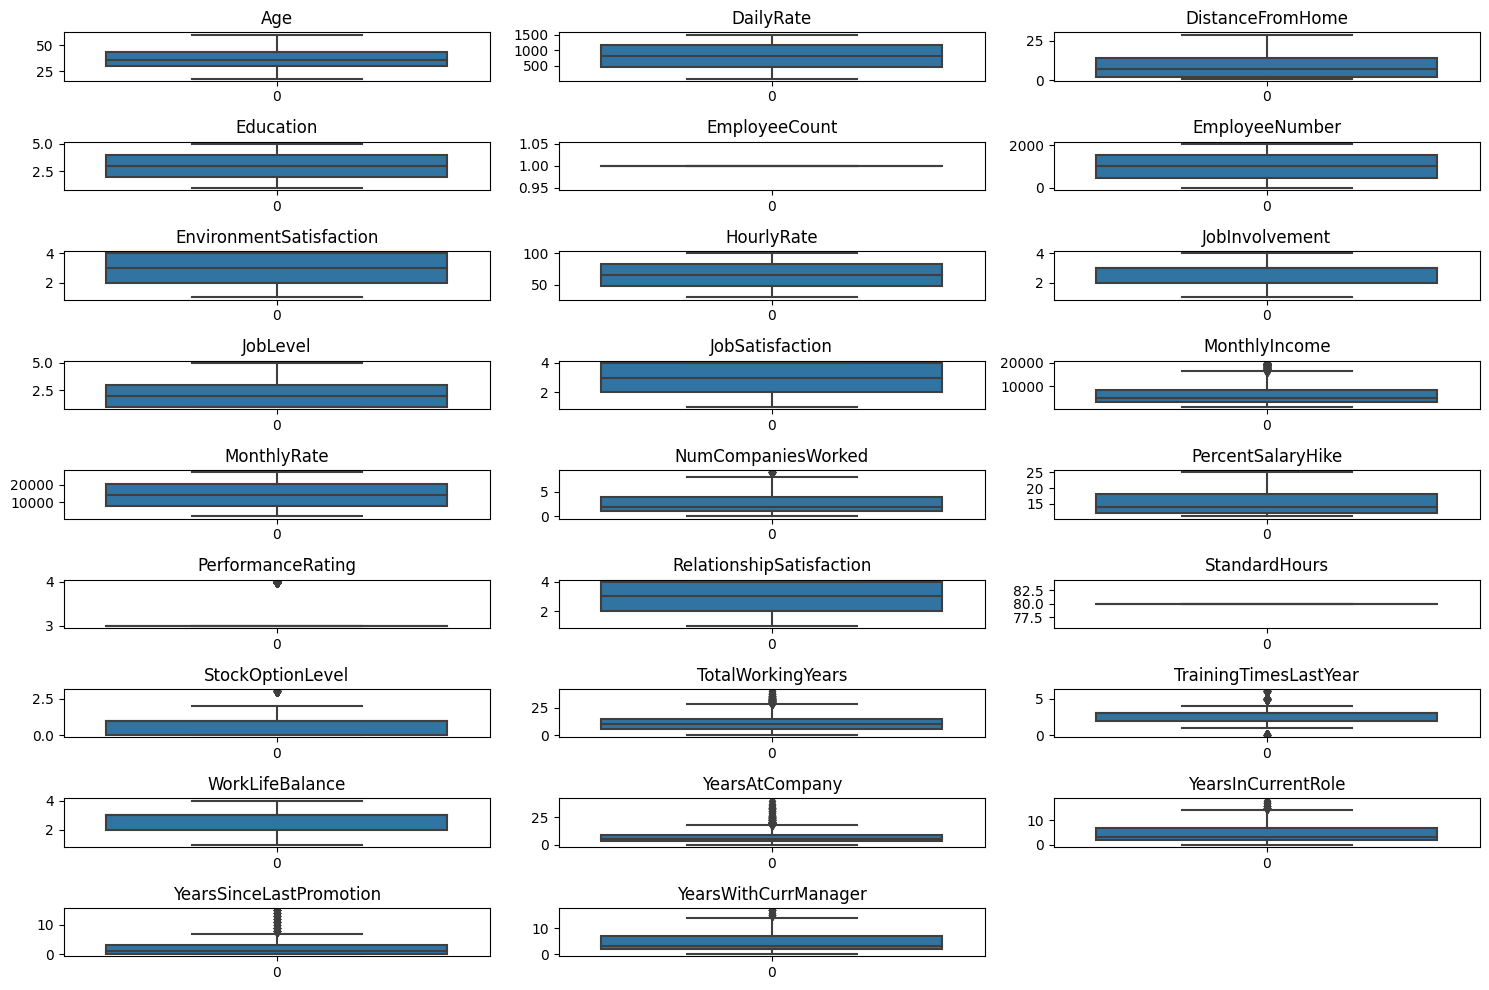

In [4]:
# 이상치 탐색
import matplotlib.pyplot as plt
import seaborn as sns


numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns


plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)
    sns.boxplot(data=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


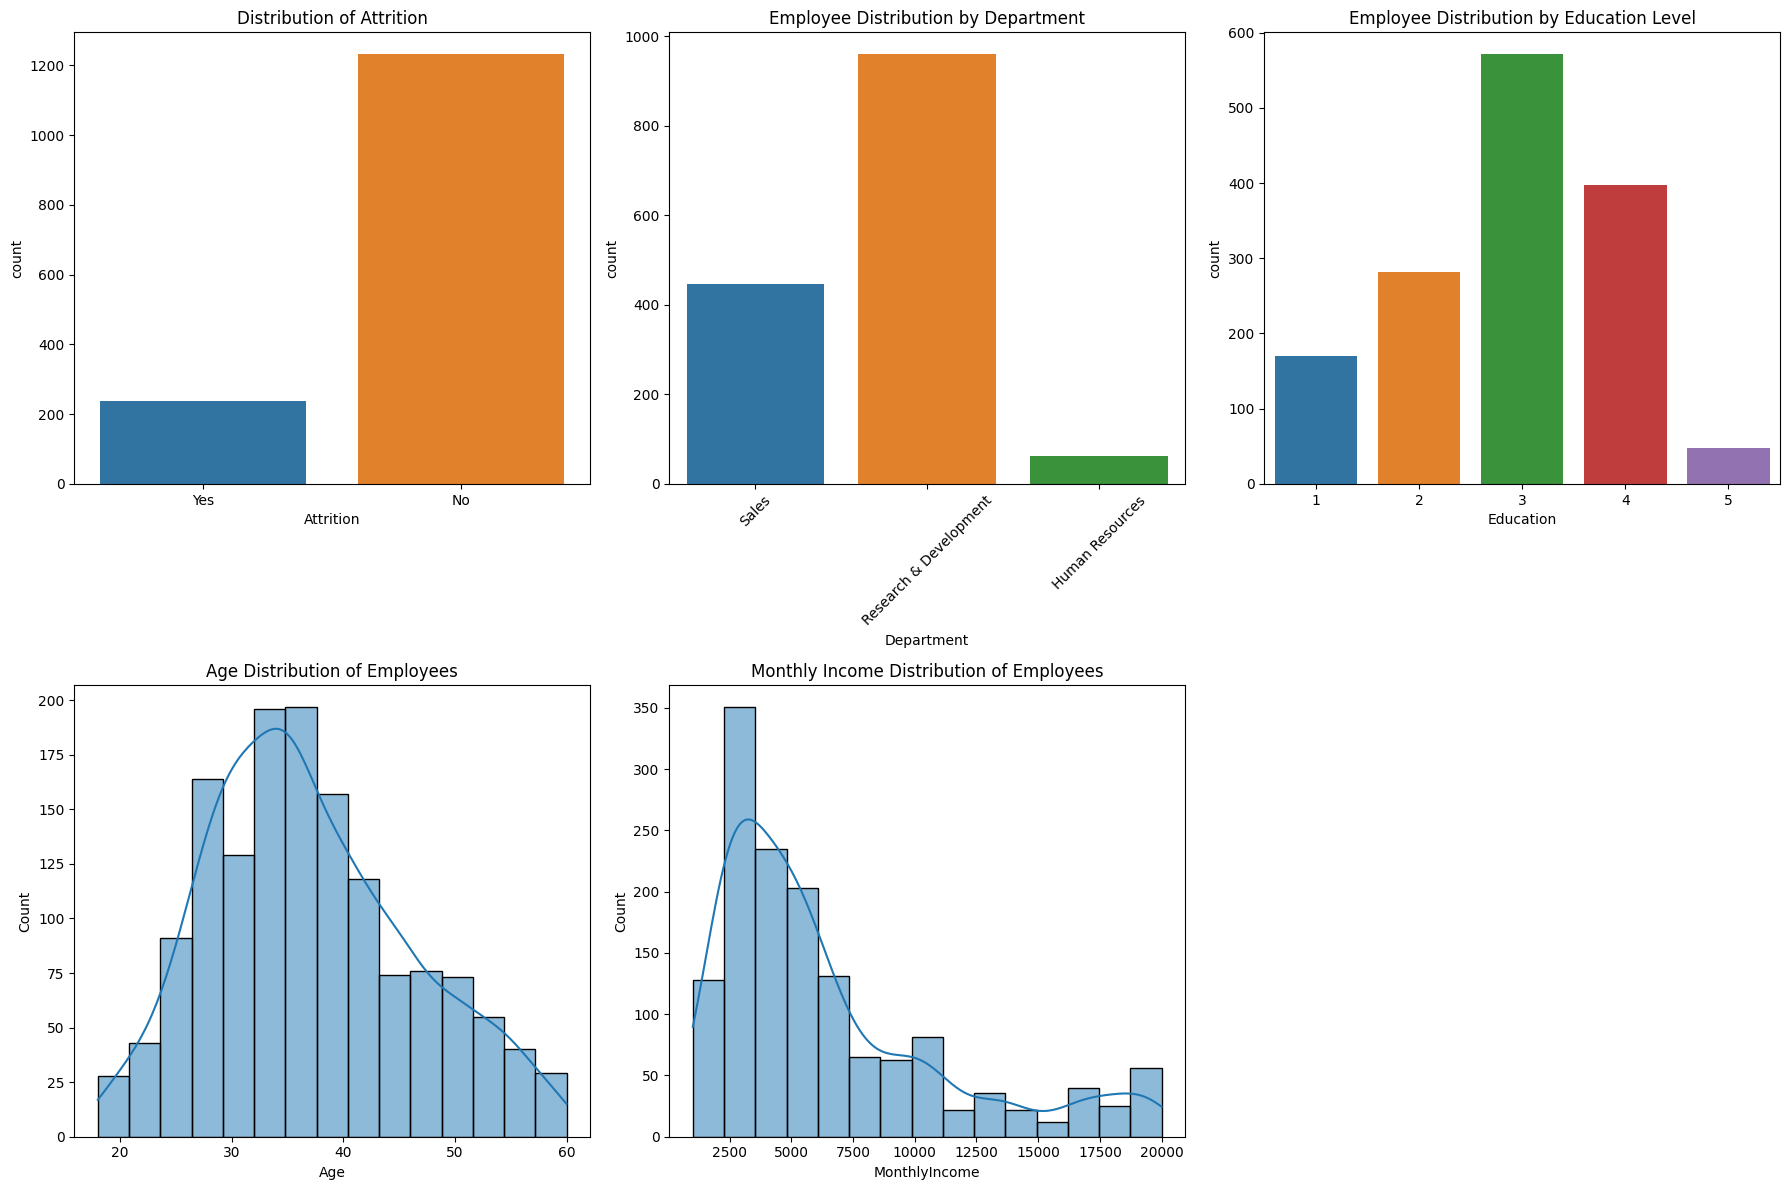

In [8]:

# 유의미한 시각화

plt.figure(figsize=(18, 12))

# 이직여부
plt.subplot(2, 3, 1)
sns.countplot(data=data, x='Attrition')
plt.title('Distribution of Attrition')

# 부서 분포
plt.subplot(2, 3, 2)
sns.countplot(data=data, x='Department')
plt.title('Employee Distribution by Department')
plt.xticks(rotation=45)

# 교육 수준 분포
plt.subplot(2, 3, 3)
sns.countplot(data=data, x='Education')
plt.title('Employee Distribution by Education Level')

# 나이 분포
plt.subplot(2, 3, 4)
sns.histplot(data=data, x='Age', bins=15, kde=True)
plt.title('Age Distribution of Employees')

# 월별 수입 분포
plt.subplot(2, 3, 5)
sns.histplot(data=data, x='MonthlyIncome', bins=15, kde=True)
plt.title('Monthly Income Distribution of Employees')

plt.tight_layout()
plt.show()


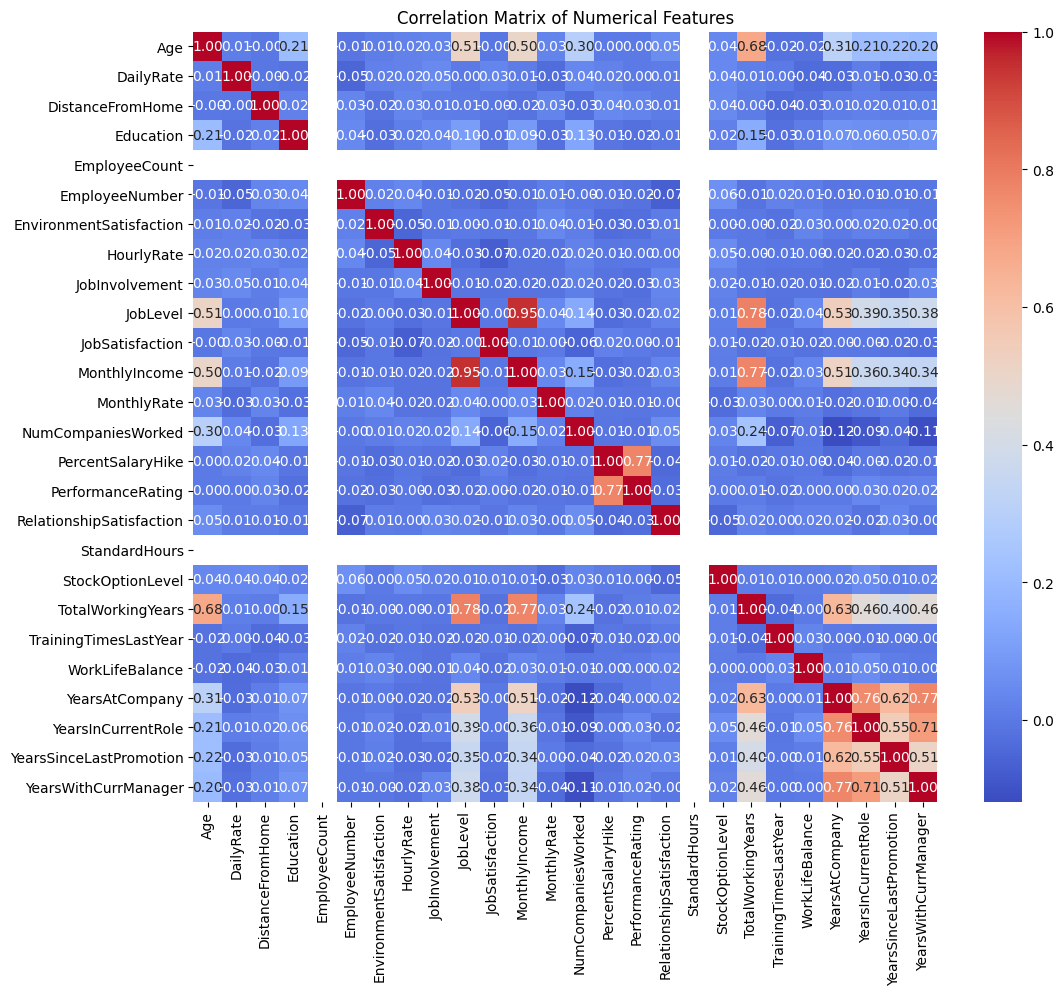

In [10]:

# 피쳐간 상관관계 분석
correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [13]:
# 근속대비 joblevel

data['PromotionSpeed'] = data['JobLevel'] / data['TotalWorkingYears']
data[['TotalWorkingYears', 'JobLevel', 'PromotionSpeed']].head()



,TotalWorkingYears,JobLevel,PromotionSpeed
0,8,2,0.250000
1,10,2,0.200000
2,7,1,0.142857
3,8,1,0.125000
4,6,1,0.166667
